<a href="https://colab.research.google.com/github/AEYSHA-AZAM/Data-Zenix-Project-6./blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models & Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [54]:
# Sample dataset creation
data = {
    'fixed acidity': np.random.uniform(6.0, 10.0, 100),
    'volatile acidity': np.random.uniform(0.1, 1.0, 100),
    'citric acid': np.random.uniform(0.0, 1.0, 100),
    'residual sugar': np.random.uniform(1.0, 5.0, 100),
    'chlorides': np.random.uniform(0.01, 0.1, 100),
    'free sulfur dioxide': np.random.uniform(5.0, 40.0, 100),
    'total sulfur dioxide': np.random.uniform(10.0, 150.0, 100),
    'density': np.random.uniform(0.990, 1.005, 100),
    'pH': np.random.uniform(2.9, 3.6, 100),
    'sulphates': np.random.uniform(0.3, 1.2, 100),
    'alcohol': np.random.uniform(8.0, 14.0, 100),
    'quality': np.random.randint(3, 9, 100)  # Random quality score from 3 to 8
}

df = pd.DataFrame(data)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.073516,0.528157,0.253368,3.425095,0.071502,7.748439,84.186004,1.003413,3.020114,1.018298,11.080965,8
1,9.253347,0.990341,0.717063,3.395647,0.080575,16.649269,10.832137,1.000678,3.033086,0.584325,10.814169,4
2,7.954938,0.782665,0.206951,4.551386,0.019751,28.691003,18.886306,0.990180,3.131926,0.894011,10.403068,4
3,7.926679,0.689251,0.461683,4.652244,0.034277,8.081422,91.277024,1.002789,3.549714,0.680288,11.986280,7
4,8.750409,0.981762,0.640997,4.247311,0.019160,22.760177,104.952758,0.999679,3.542639,0.529066,10.171451,8


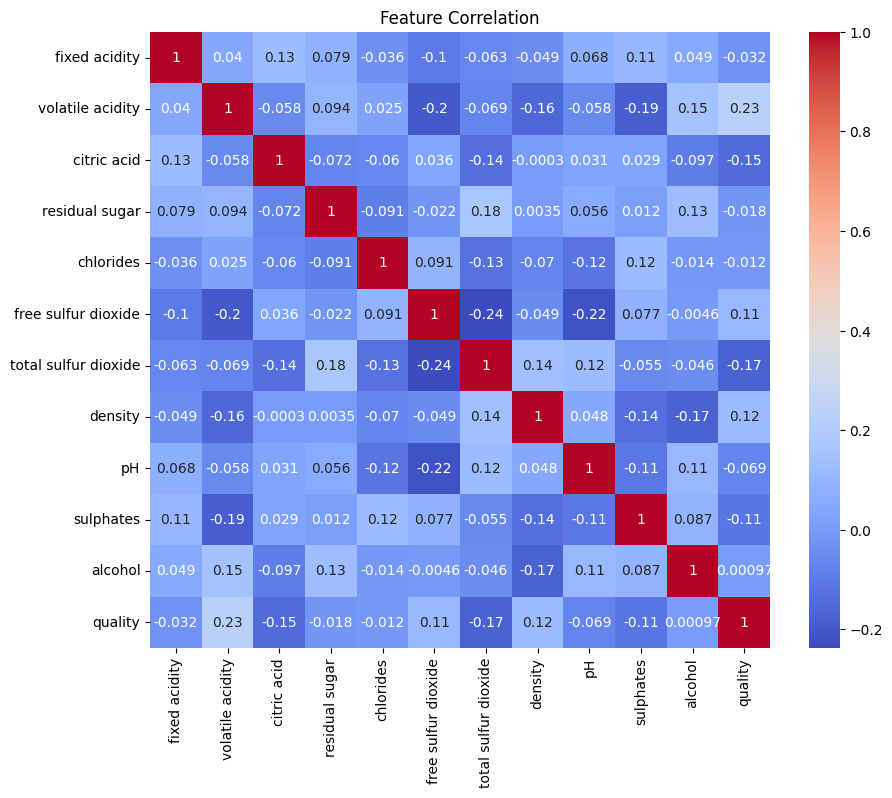

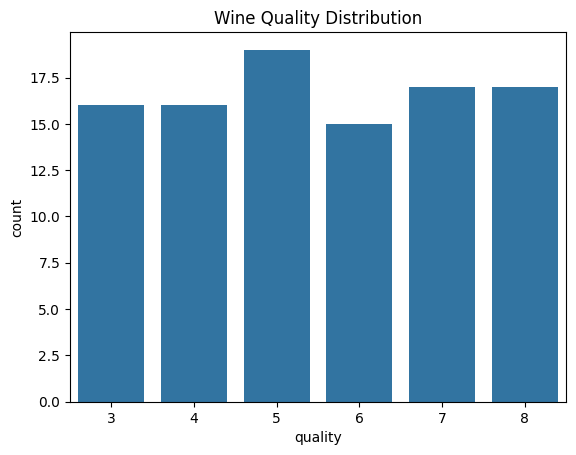

In [55]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Quality distribution
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()


In [56]:
# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.1
              precision    recall  f1-score   support

           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.20      0.25      0.22         4
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         5

    accuracy                           0.10        20
   macro avg       0.12      0.12      0.12        20
weighted avg       0.09      0.10      0.09        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
sgd = SGDClassifier()
sgd.fit(X_train_scaled, y_train)
sgd_preds = sgd.predict(X_test_scaled)

print("SGD Accuracy:", accuracy_score(y_test, sgd_preds))
print(classification_report(y_test, sgd_preds))


SGD Accuracy: 0.1
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.09      0.50      0.15         2
           6       0.25      0.25      0.25         4
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         5

    accuracy                           0.10        20
   macro avg       0.06      0.12      0.07        20
weighted avg       0.06      0.10      0.07        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc_preds = svc.predict(X_test_scaled)

print("SVC Accuracy:", accuracy_score(y_test, svc_preds))
print(classification_report(y_test, svc_preds))


SVC Accuracy: 0.25
              precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         3
           5       0.15      1.00      0.27         2
           6       0.00      0.00      0.00         4
           7       0.67      0.50      0.57         4
           8       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.19      0.33      0.21        20
weighted avg       0.18      0.25      0.18        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


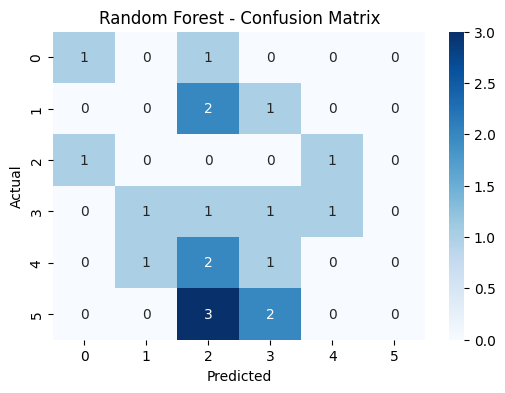

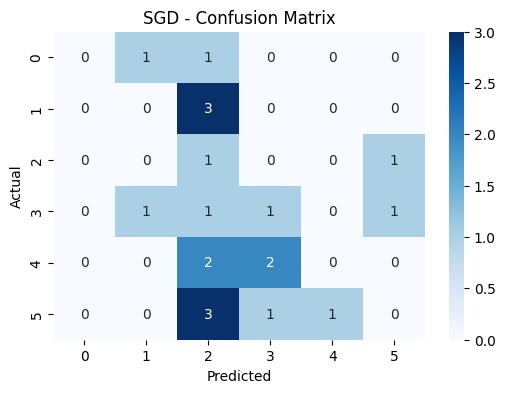

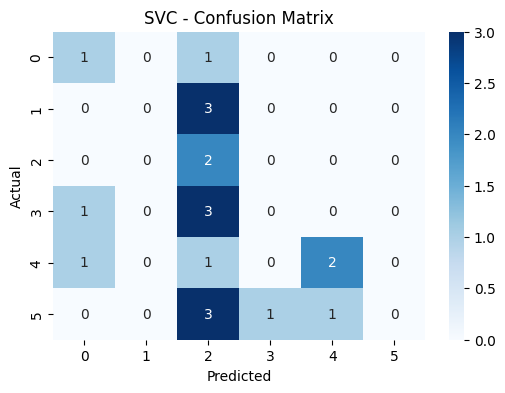

In [60]:
models = {
    'Random Forest': rf_preds,
    'SGD': sgd_preds,
    'SVC': svc_preds
}

for name, preds in models.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [61]:
print("📊 Final Accuracy Comparison:")
for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc:.2f}")


📊 Final Accuracy Comparison:
Random Forest: 0.10
SGD: 0.10
SVC: 0.25
